In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5)})


In [2]:
import networkx as nx
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [10]:


dfnodes = pd.read_excel('Nodes.xlsx', index_col='id')
print (dfnodes)


                   city   latitude  longitude  demand
id                                                   
1              Duisburg  51.459996   6.797781  164.60
2   Mülheim an der Ruhr  51.431764   6.875157   57.10
3                 Essen  51.404408   7.046323  189.92
4             Dortmund   51.525206   7.443865  188.87
5       Castrop Rauxel   51.582929   7.289196   24.42
6                Herne   51.564302   7.240804   51.81
7        Gelsenkirchen   51.530747   7.055356   85.75
8               Bottrop  51.499228   6.945644   39.59
9            Oberhausen  51.482974   6.824000   70.61
10            Dinslaken  51.561551   6.692193   22.50
11                 Hamm  51.693204   7.840569   59.08
12               Voerde  51.629205   6.641905   11.94
13                Wesel  51.645454   6.604454   20.05
14                Hünxe  51.648273   6.773660    4.56
15              Dorsten  51.662142   7.003693   24.90
16      Haltern am See   51.713169   7.266746   12.82
17              Datteln  51.

In [11]:

dfedges = pd.read_excel('Edges.xlsx')
print (dfedges)

    source  target  distance  time  price
0        1       2         9  0.74   0.30
1        1       9         4  0.50   0.10
2        1      10        27  2.02   0.85
3        1      22        36  2.21   1.10
4        3       7        50  4.32   1.50
5        3       8        42  3.39   1.30
6        3       9        32  2.45   1.00
7        4       5        21  1.22   0.65
8        4      19        11  0.63   0.35
9        5       6         4  0.50   0.10
10       6       7        13  1.28   0.40
11       7       8         8  0.71   0.25
12       8       9         9  0.90   0.30
13      10      12        19  1.17   0.60
14      11      18        27  2.54   0.85
15      12      20        38  4.33   1.15
16      13      14        13  2.01   0.40
17      13      21        11  0.50   0.35
18      13      22        11  0.83   0.35
19      14      15        17  2.07   0.55
20      15      20        11  1.03   0.35
21      16      17        10  1.32   0.30
22      16      20        17  1.52

In [12]:
dfedges.columns


Index(['source', 'target', 'distance', 'time', 'price'], dtype='object')

In [13]:
G = nx.from_pandas_edgelist(dfedges, 'source','target',['distance', 'time','price'],create_using=nx.Graph)

In [14]:
print(dfnodes)

                   city   latitude  longitude  demand
id                                                   
1              Duisburg  51.459996   6.797781  164.60
2   Mülheim an der Ruhr  51.431764   6.875157   57.10
3                 Essen  51.404408   7.046323  189.92
4             Dortmund   51.525206   7.443865  188.87
5       Castrop Rauxel   51.582929   7.289196   24.42
6                Herne   51.564302   7.240804   51.81
7        Gelsenkirchen   51.530747   7.055356   85.75
8               Bottrop  51.499228   6.945644   39.59
9            Oberhausen  51.482974   6.824000   70.61
10            Dinslaken  51.561551   6.692193   22.50
11                 Hamm  51.693204   7.840569   59.08
12               Voerde  51.629205   6.641905   11.94
13                Wesel  51.645454   6.604454   20.05
14                Hünxe  51.648273   6.773660    4.56
15              Dorsten  51.662142   7.003693   24.90
16      Haltern am See   51.713169   7.266746   12.82
17              Datteln  51.

In [15]:
dfnodes.columns

Index(['city', 'latitude', 'longitude', 'demand'], dtype='object')

In [16]:
nx.set_node_attributes(G, dfnodes['city'], 'city')
nx.set_node_attributes(G, dfnodes['demand'], 'demand')
nx.set_node_attributes(G, dfnodes['latitude'], 'lat')
nx.set_node_attributes(G, dfnodes['longitude'], 'long')

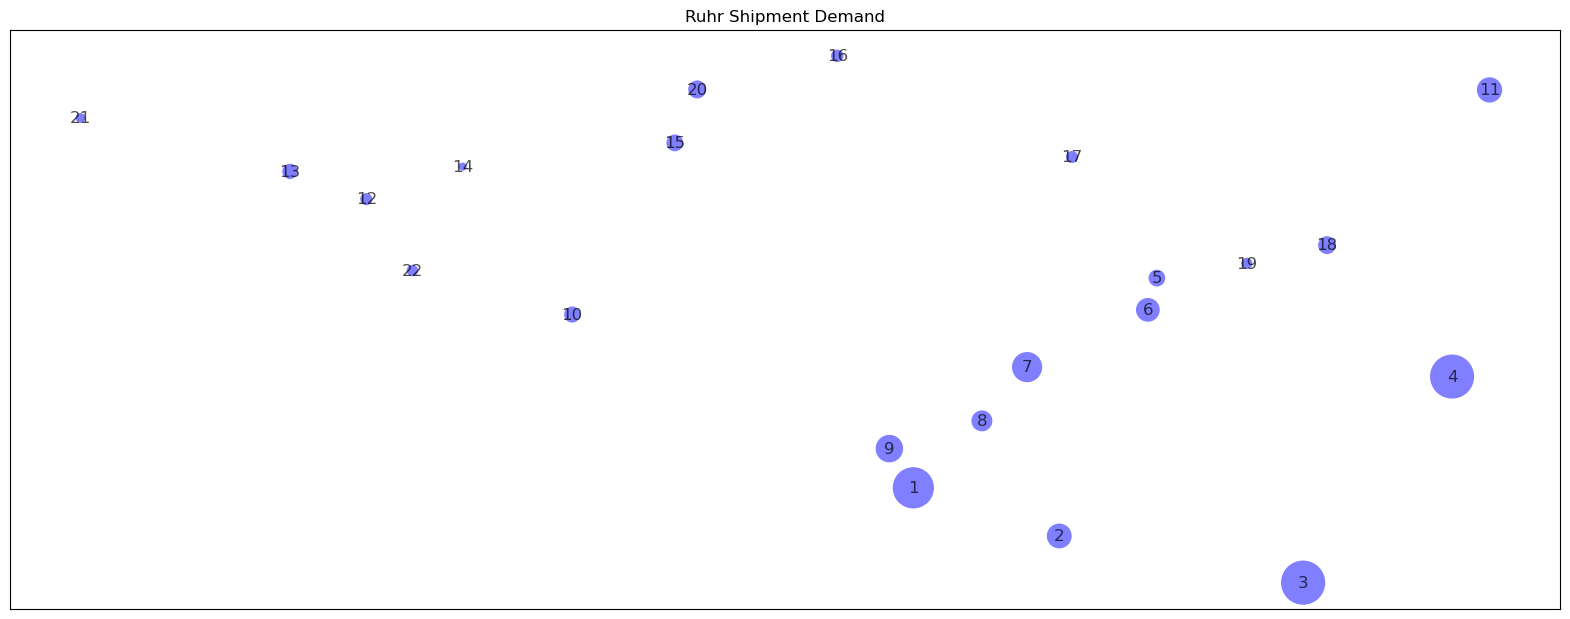

In [35]:
# Draw network 

d = dict(dfnodes['demand'])
#pos = nx.spring_layout(G, seed=7) 
fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Demand')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx_nodes(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')

ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)

fig.savefig('ruhr shipment graph nodes')
plt.show()

In [36]:
import math
pos = dict()
for v in G.nodes:
    long = G.nodes[v]['long']
    lat = G.nodes[v]['lat']
    pos[v] = ((long + 90) * math.cos(2 * math.pi * lat / 360), lat)
    #print(pos[v])

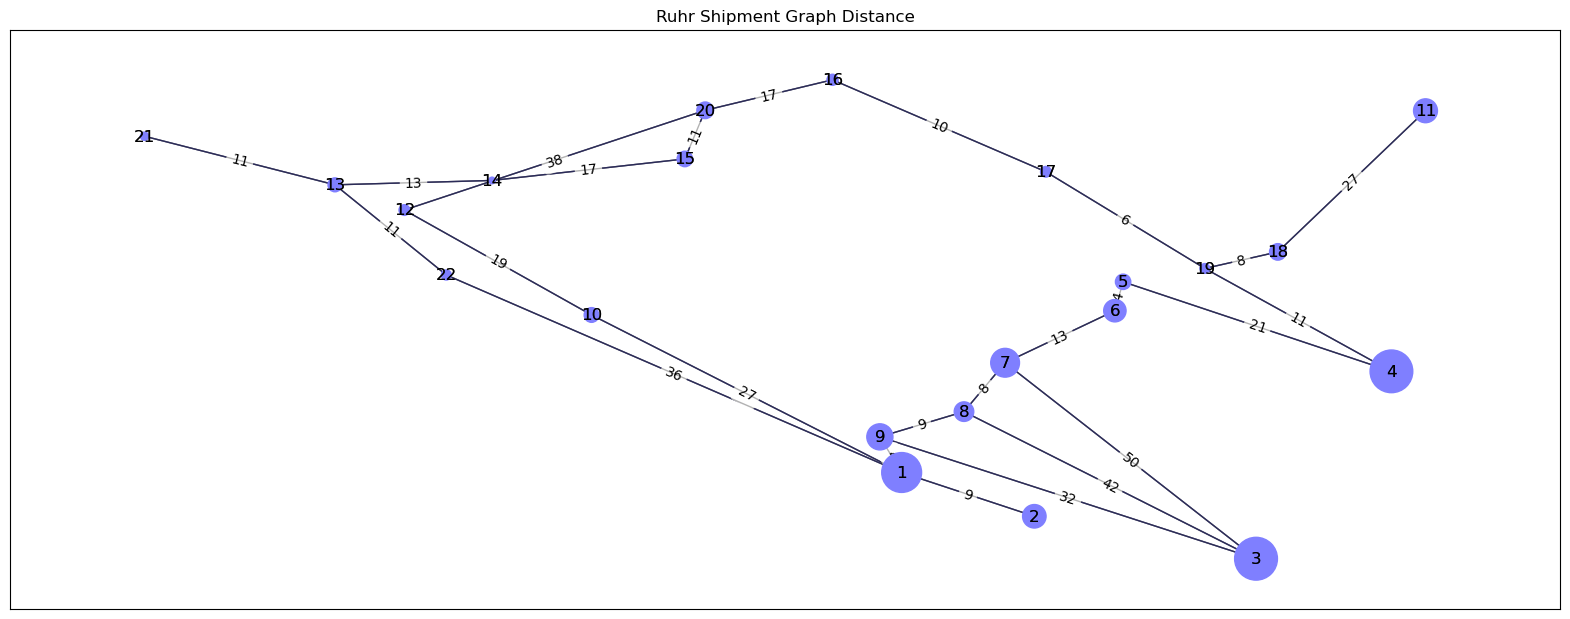

In [37]:
# Draw network 


#pos = nx.spring_layout(G, seed=7) 
fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Graph Distance')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')
for e in G.edges:
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=[e],edge_color='#7f7fff', alpha=0.5, arrows=False)
ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)
labels = nx.get_edge_attributes(G,'distance') # Label on the edges are distances
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G , pos = pos, alpha=0.3) #edge width represents price
fig.savefig('ruhr shipment graph distance')
plt.show()

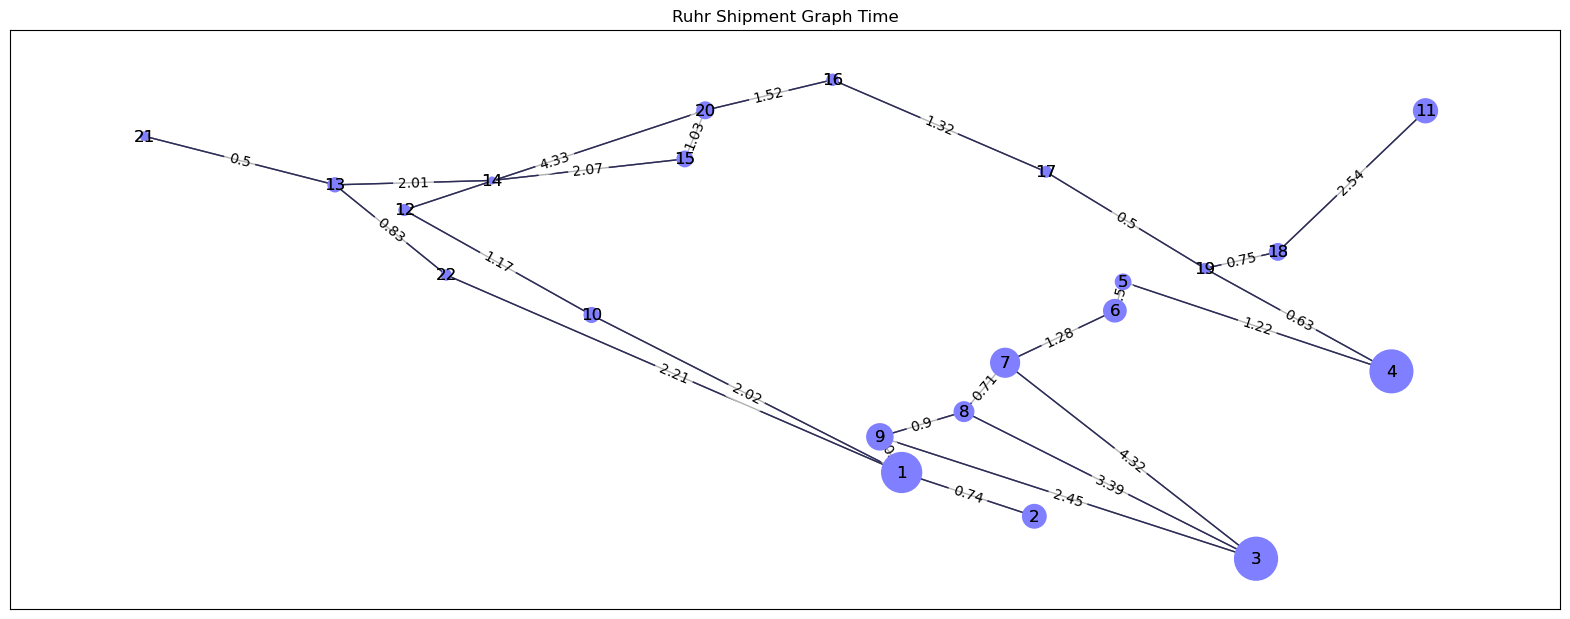

In [39]:
# Draw network 



fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Graph Time')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')
for e in G.edges:
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=[e],edge_color='#7f7fff', alpha=0.5, arrows=False)
ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)
labels = nx.get_edge_attributes(G,'time') # Label on the edges are distances
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G , pos = pos, alpha=0.3) #edge width represents price
fig.savefig('ruhr shipment graph time')
plt.show()

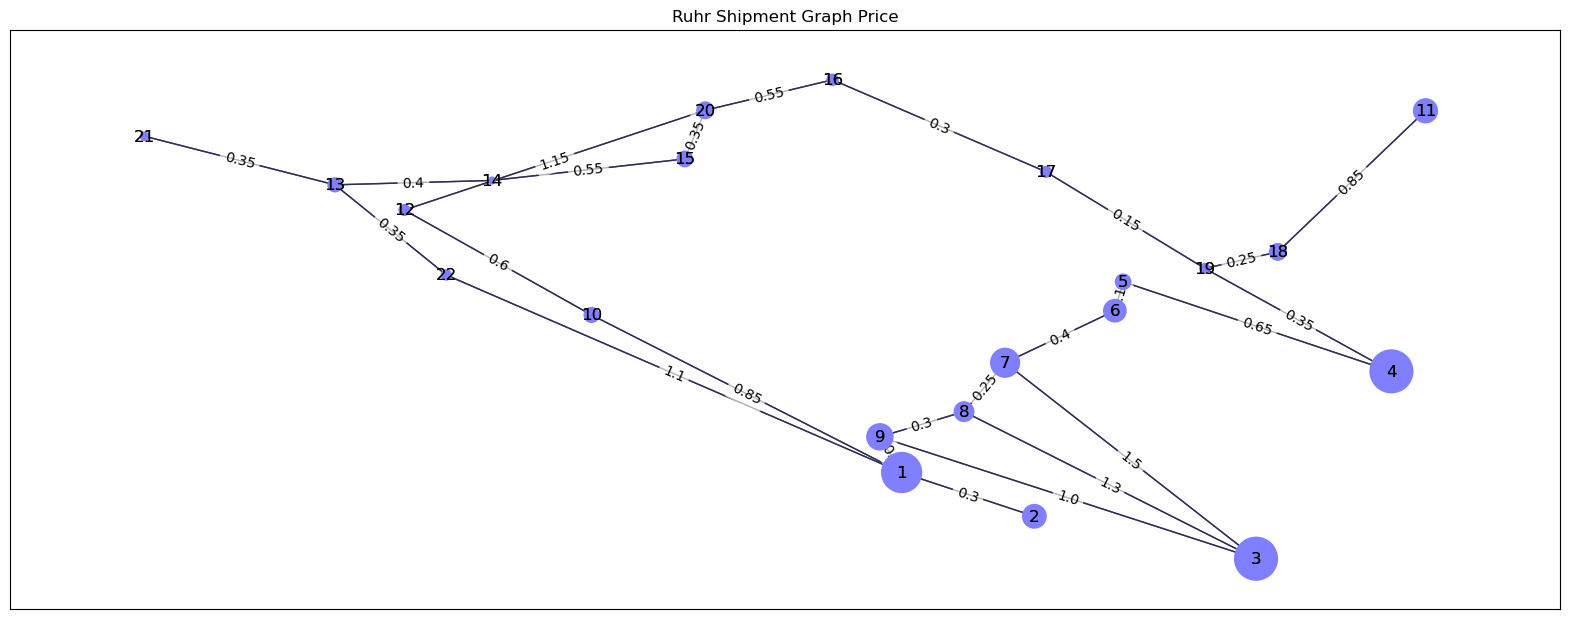

In [40]:
# Draw network 



fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Graph Price')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')
for e in G.edges:
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=[e],edge_color='#7f7fff', alpha=0.5, arrows=False)
ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)
labels = nx.get_edge_attributes(G,'price') # Label on the edges are distances
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G , pos = pos, alpha=0.3) #edge width represents price
fig.savefig('ruhr shipment graph price')
plt.show()

In [41]:
#returns frequency for degree 0, 1,2...
nx.degree_histogram(G)

[0, 3, 11, 7, 1]

In [42]:
list(nx.center(G,weight='Distance')) # centers of the graph

[12, 20, 16, 17]

In [43]:
nx.average_degree_connectivity(G, weight="Distance")

{4: 2.0, 1: 3.0, 3: 2.5238095238095237, 2: 2.5454545454545454}

In [44]:
degree_centrality=nx.degree_centrality(G)
df=pd.DataFrame.from_dict(degree_centrality, orient='index')
df.rename(columns={0:'degree'}, inplace=True)


betweenness_centrality=nx.betweenness_centrality(G)
df['between']=betweenness_centrality

eigenvector_centrality=nx.eigenvector_centrality(G)
df['eigenvector']=betweenness_centrality

closeness_centrality=nx.closeness_centrality(G)
df['closeness']=closeness_centrality
df.to_csv('centrality')
df

,degree,between,eigenvector,closeness
1,0.190476,0.359524,0.359524,0.287671
2,0.047619,0.000000,0.000000,0.225806
9,0.142857,0.233333,0.233333,0.269231
10,0.095238,0.166667,0.166667,0.276316
22,0.095238,0.140476,0.140476,0.247059
3,0.142857,0.080952,0.080952,0.256098
7,0.142857,0.176190,0.176190,0.244186
8,0.142857,0.080952,0.080952,0.256098
4,0.095238,0.152381,0.152381,0.230769
5,0.095238,0.147619,0.147619,0.228261


In [45]:
path = nx.shortest_path(G, 1, 19, weight="distance")
print(path)

[1, 9, 8, 7, 6, 5, 4, 19]


In [46]:
for v in G.nodes:
    for u in G.nodes:
        if u<=v: continue
        print('shortest path between ', v ,'and' , u)
        path=nx.shortest_path(G, u,v, weight='distance')
        print(path)

shortest path between  1 and 2
[2, 1]
shortest path between  1 and 9
[9, 1]
shortest path between  1 and 10
[10, 1]
shortest path between  1 and 22
[22, 1]
shortest path between  1 and 3
[3, 9, 1]
shortest path between  1 and 7
[7, 8, 9, 1]
shortest path between  1 and 8
[8, 9, 1]
shortest path between  1 and 4
[4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 5
[5, 6, 7, 8, 9, 1]
shortest path between  1 and 19
[19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 6
[6, 7, 8, 9, 1]
shortest path between  1 and 12
[12, 10, 1]
shortest path between  1 and 11
[11, 18, 19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 18
[18, 19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 20
[20, 12, 10, 1]
shortest path between  1 and 13
[13, 22, 1]
shortest path between  1 and 14
[14, 13, 22, 1]
shortest path between  1 and 21
[21, 13, 22, 1]
shortest path between  1 and 15
[15, 14, 13, 22, 1]
shortest path between  1 and 16
[16, 17, 19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 17
